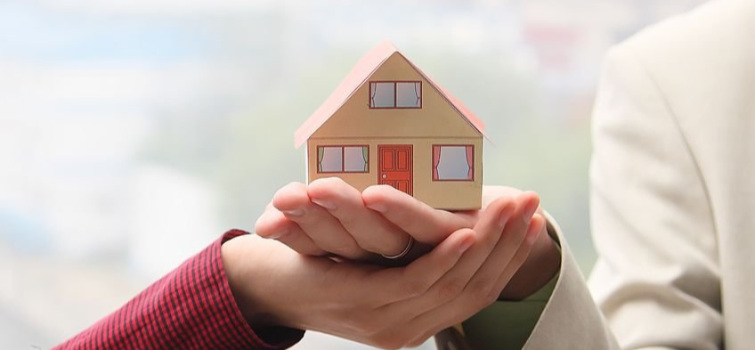

In [1]:
from IPython.display import Image
import os
Image('../input/photo2/house.png')

In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/photo2/house.png
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# **Data Information**
* 共1460筆資料
* 共有79個特徵
* 許多欄位都有missing values
* 數據有38個數值型和43個類別型

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Target Information

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

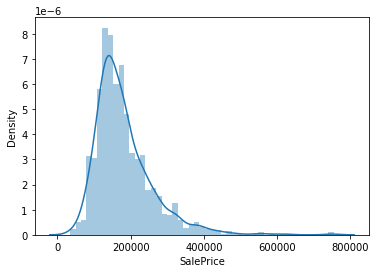

In [5]:
sns.distplot(train['SalePrice'])

In [6]:
print('峰值：',train['SalePrice'].skew())
print('偏度：',train['SalePrice'].kurt())

峰值： 1.8828757597682129
偏度： 6.536281860064529


* 呈正態分佈
* 峰值>1,屬於高尖
* 偏度>1,屬於右偏型

# **Feature Engineering**

**我們取用數值型的特徵**

In [7]:
types=['float64','int64']
features=[]
for i in train.columns:
    if train[i].dtype in types:
        features.append(i)
train1=train[features]
train1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


* 一般研究者認為，相關係數0.3以下為低相關，0.3~0.7為中等相關，0.7以上為高度相關
* 把和target低相關的特徵去除

In [8]:
corrcoef=train.corr()
imp=corrcoef.index[abs(corrcoef['SalePrice'])>0.3]
imp

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

**選用的特徵**
* ？？？'LotFrontage'：Linear feet of street connected to property
* 總體評價'OverallQual'：Overall material and finish quality
* 原建日期'YearBuilt'：Original construction date
* 改造日期'YearRemodAdd'：Remodel date
* 砌體單板面積'MasVnrArea'：Masonry veneer area in square feet
* 1型成品平方英尺'BsmtFinSF1'：Type 1 finished square feet
* 地下室總平方英尺'TotalBsmtSF'：Total square feet of basement area
* 一樓平方英尺'1stFlrSF'：First Floor square feet
* 二樓平方英尺'2ndFlrSF'：Second floor square feet
* 地上（地上）居住面積平方英尺'GrLivArea'：Above grade (ground) living area square feet
* 檔次以上的全套衛浴'FullBath'：Full bathrooms above grade
* 高於等級的房間總數（不包括浴室）'TotRmsAbvGrd'：Total rooms above grade (does not include bathrooms)
* 壁爐數量'Fireplaces'：Number of fireplaces
* 車庫建成年份'GarageYrBlt'：Year garage was built
* 車庫大小（以汽車容量計）'GarageCars'：Size of garage in car capacity
* 車庫面積（平方英尺）'GarageArea'：Size of garage in square feet
* 木甲板面積'WoodDeckSF'：Wood deck area in square feet
* 開放門廊面積'OpenPorchSF'：Open porch area in square feet

In [9]:
imp_feas=['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF','SalePrice']
train1=train1[imp_feas]
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageYrBlt   1379 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [10]:
imptf=['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
test1=test[imptf]

**關係矩陣**

<AxesSubplot:>

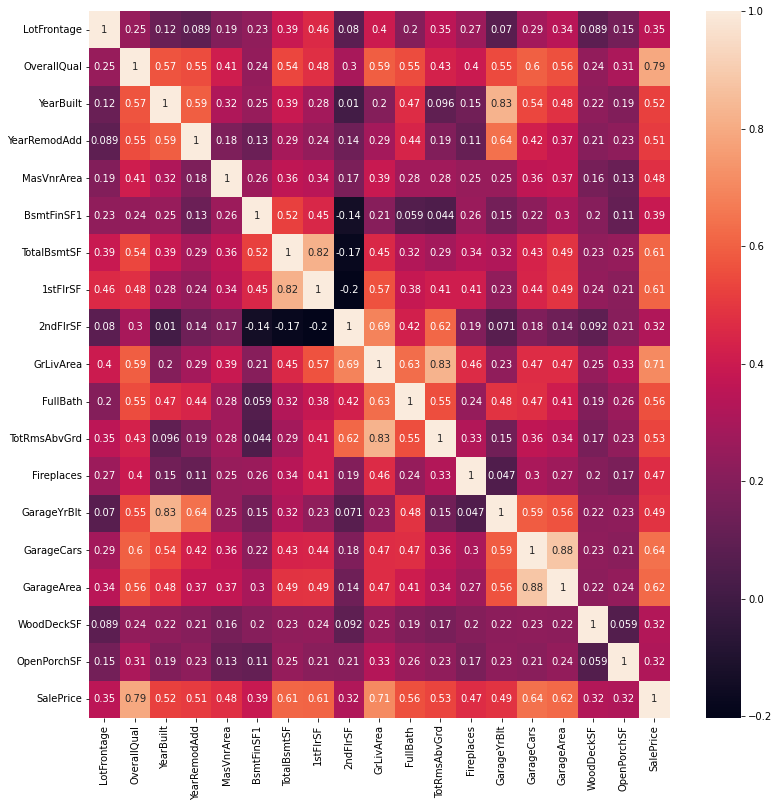

In [11]:
f,ax=plt.subplots(figsize=(13,13))
sns.heatmap(train1.corr(),annot=True)

**這裡我們可以發現一些訊息：**
1. 對於房價高低最相關的是OverallQual 總體評價
2. 次是GrLivArea 居住面積，相關係數最高的兩個特徵都相當的直覺
3. 第三個是GarageCars 車位多寡，大房子相對來說車位會相對的多，而價格也會相對提高，十分合理
4. 不管是建造年份,車庫的建造年份都對價格有一定程度的影響
5. 這邊考慮到一個點，光是車位這個訊息就佔個三個特徵，是否會對房價的程度過大？
6. 而地下室和一樓的面積對於房價也是影響很大，但是二樓的面積卻忽然小了很多？


In [12]:
px.box(data_frame=train1,x='OverallQual',y='SalePrice')

* 總體評價高的房子價格相對來說越高，挺直覺的

In [13]:
#查看GrLivArea
px.scatter(x='GrLivArea',y='SalePrice',data_frame=train1)

* 有兩個離群值，若將他們去除，是否會好一些呢？

In [14]:
#查看車位
px.box(data_frame=train1,x='GarageCars',y='SalePrice')

* 這裡有個奇怪的現象，四個車位的房子相對於三個車位的房子來說竟然比較低，究竟花生省魔術？若把四車位併入三車位，結果會更好嗎？

# **Missing Values**

In [15]:
train1['LotFrontage']=train1['LotFrontage'].fillna(train1['LotFrontage'].mean())
train1['MasVnrArea']=train1['MasVnrArea'].fillna(train1['MasVnrArea'].mean())
train1['GarageCars']=train1['GarageCars'].fillna(0)
train1['GarageYrBlt']=train1['GarageYrBlt'].fillna(train1['GarageYrBlt'].mean())

In [16]:
test1['LotFrontage']=test1['LotFrontage'].fillna(test1['LotFrontage'].mean())
test1['MasVnrArea']=test1['MasVnrArea'].fillna(test1['MasVnrArea'].mean())
test1['GarageCars']=test1['GarageCars'].fillna(0)
test1['GarageYrBlt']=test1['GarageYrBlt'].fillna(test1['GarageYrBlt'].mean())
test1['GarageArea']=test1['GarageArea'].fillna(test1['GarageArea'].mean())
test1['BsmtFinSF1']=test1['BsmtFinSF1'].fillna(0)
test1['TotalBsmtSF']=test1['TotalBsmtSF'].fillna(0)

# **Ready to Train**

In [17]:
x=train1.drop('SalePrice',axis=1)
y=train1['SalePrice']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [20]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=500,max_depth=4,learning_rate=0.01,reg_alpha=1,reg_lambda=0.5)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print(rmsle(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

26177.931964153122
685284121.9198297
0.9041276898783452


In [21]:
preds=xgb.predict(test1)

In [22]:
y_pred=pd.DataFrame()
y_pred['SalePrice'] = preds
y_pred['Id'] = test['Id']

In [23]:
y_pred.to_csv('house_price_blend22.csv',index=False)

# **Reference**
* 這裡只使用了數值型的特徵，我們達到了0.15的LOSS，若再繼續把類別型的特徵加入進來，相信可以達到更好的LOSS
* 還有許多方法可以降低LOSS，例：調參數,嘗試使用其他的模型,做更好的特徵工程,使用交叉驗證.....等